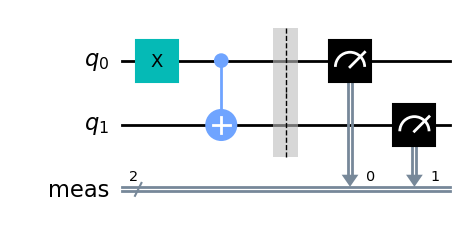

In [3]:
#creating a circuit that adds two qubit. to add two qubits, we need four! two that we add, two to take the measurement 
#we use the cnot gate cx which changes the second qubit iff the first is one. chaining half-adders can build a whole computer so we only need one half adder to build
'''
our adder needs to
0+0 = 00
0+1 = 01
1+0 = 01
1+1 = 10
which is precisely what cx does! note that the lhs is decimal and right their binary counterparts
'''
from qiskit import QuantumCircuit
#lets first draw a cx for practice
cnot = QuantumCircuit(2)
cnot.x(0)
cnot.cx(0,1)
cnot.measure_all()
cnot.draw()

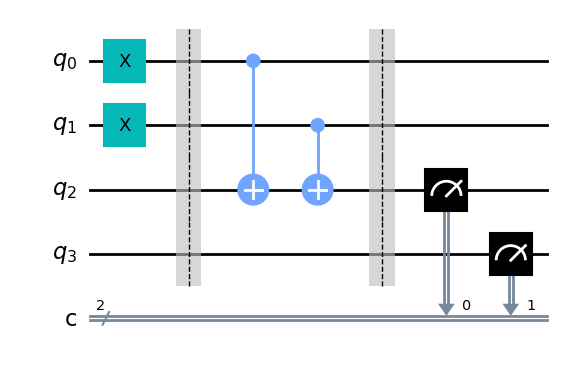

In [8]:
#the above circuit overwrites over q1 which means it disturbs the state. thats why we need different qubits for measure
#need to specify the input qubits in circuit arg otherwise measure will be treated as range. also need barrier after cx
cnot1 = QuantumCircuit(4, 2)
cnot1.x([0,1])
cnot1.barrier()
cnot1.cx([0,1], 2)
cnot1.barrier()
cnot1.measure(2, 0)
cnot1.measure(3, 1)
cnot1.draw()
#continue at home

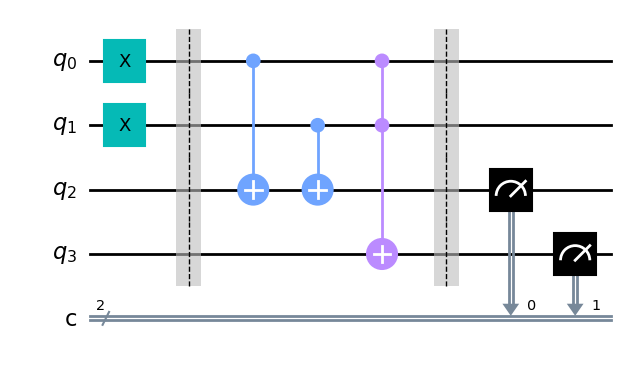

In [16]:
#we need to get 1+1=11. Toffoli is the new AND. denoted by ccx
cnot2 = QuantumCircuit(4, 2)
cnot2.x([0,1])
cnot2.barrier()
cnot2.cx([0, 1], 2)
cnot2.ccx(0, 1, 3)#apply Toffoli to 0 and 1 and store output in qubit 3
#masuring bit first
cnot2.barrier()
cnot2.measure(2, 0)
cnot2.measure(3, 1)
cnot2.draw()

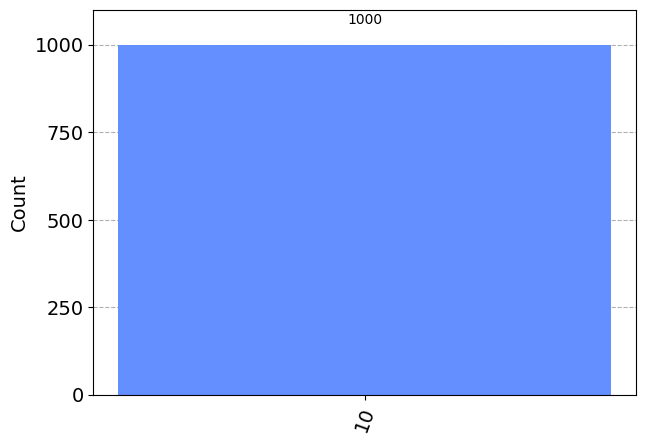

In [23]:
from qiskit.visualization import plot_histogram
from qiskit import Aer, execute
sim = Aer.get_backend('qasm_simulator')
job = execute(cnot2, sim, shots = 1000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

In [ ]:
#Finally we have added 1+1 and gotten 10(decimal for 2!)